<a href="https://colab.research.google.com/github/arpan-sharma/Machine-learning_projects/blob/main/ar_weather_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install geoplot


In [ ]:
pip install geocoder


In [ ]:
pip install geopy

In [ ]:
#import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import folium
import imageio
from tqdm import tqdm_notebook
from folium.plugins import MarkerCluster
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import mapclassify as mc
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import scipy
from itertools import product
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from geopy.geocoders import Nominatim

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#read csv File 
data = pd.read_csv('/content/drive/MyDrive/weather_data/GlobalLandTemperaturesByMajorCity.csv')

In [ ]:
city_data = data.drop_duplicates(['City'])
city_data.head()
# data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1977,1850-01-01,15.986,1.537,Addis Abeba,Ethiopia,8.84N,38.11E
3942,1796-01-01,19.649,2.286,Ahmadabad,India,23.31N,72.52E
6555,1791-05-01,20.836,1.993,Aleppo,Syria,36.17N,37.79E
9224,1791-05-01,20.772,1.848,Alexandria,Egypt,31.35N,30.16E


In [ ]:
LAT = []
LONG = []
for city in city_data.City.tolist():
    locator = Nominatim(user_agent="myGeocoder")
    location = locator.geocode(city)
    LAT.append(location.latitude)
    LONG.append(location.longitude)
    

([<matplotlib.patches.Wedge at 0x7f6c8d170bd0>,
 [Text(-1.0637911984123485, 0.2799076386603612, 'Non NaN elements'),
  Text(1.3539160623680835, -0.3562461172584256, 'NaN elements')])

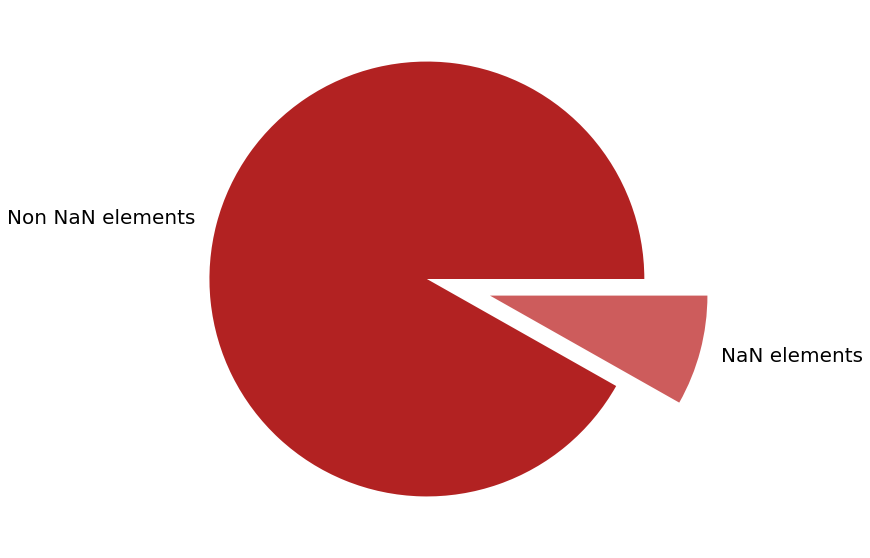

In [ ]:
explodes = (0,0.3)
plt.pie(data[data['City']=='Jaipur'].AverageTemperature.isna().value_counts(),explode=explodes,startangle=0,colors=['firebrick','indianred'],
   labels=['Non NaN elements','NaN elements'], textprops={'fontsize': 20})

In [ ]:
jaipur_data = data[data['City']=='Jaipur']

In [ ]:
# print(jaipur_data)
jaipur_data['AverageTemperature']=jaipur_data.AverageTemperature.fillna(method='bfill')

In [ ]:
jaipur_data['AverageTemperatureUncertainty']=jaipur_data.AverageTemperatureUncertainty.fillna(method='bfill')

In [ ]:
#test
explodes = (0,0.3)
plt.pie(jaipur_data[jaipur_data['City']=='Jaipur'].AverageTemperature.isna().value_counts(),explode=explodes,startangle=0,colors=['firebrick','indianred'],
   labels=['Non NaN elements','NaN elements'], textprops={'fontsize': 20})

In [ ]:
jaipur_data = jaipur_data.reset_index()

In [ ]:
jaipur_data = jaipur_data.drop(columns=['index'])

In [ ]:
jaipur_data.dt = pd.to_datetime(jaipur_data.dt)

In [ ]:
#  df.head(len(df)-21)
# jaipur_data.drop(df.tail(1).index,inplace=True) 
# print(jaipur_data[:-1])

# jaipur_data

             dt  AverageTemperature  ...  Latitude Longitude
0    1796-01-01              15.860  ...    26.52N    75.22E
1    1796-02-01              18.296  ...    26.52N    75.22E
2    1796-03-01              22.386  ...    26.52N    75.22E
3    1796-04-01              29.401  ...    26.52N    75.22E
4    1796-05-01              34.117  ...    26.52N    75.22E
...         ...                 ...  ...       ...       ...
2606 2013-03-01              24.509  ...    26.52N    75.22E
2607 2013-04-01              29.809  ...    26.52N    75.22E
2608 2013-05-01              35.003  ...    26.52N    75.22E
2609 2013-06-01              32.896  ...    26.52N    75.22E
2610 2013-07-01              29.936  ...    26.52N    75.22E

[2611 rows x 7 columns]


In [ ]:
YEAR = []
MONTH = []
DAY = []
WEEKDAY = []
for i in range(len(jaipur_data)):
    WEEKDAY.append(jaipur_data.dt[i].weekday())
    DAY.append(jaipur_data.dt[i].day)
    MONTH.append(jaipur_data.dt[i].month)
    YEAR.append(jaipur_data.dt[i].year)

In [ ]:
jaipur_data['Year'] = YEAR
jaipur_data['Month'] = MONTH
jaipur_data['Day'] = DAY 
jaipur_data['Weekday'] = WEEKDAY

In [ ]:
change_year_index = []
change_year = []
year_list = jaipur_data['Year'].tolist()
for y in range(0,len(year_list)-1):
    if year_list[y]!=year_list[y+1]:
        change_year.append(year_list[y+1])
        change_year_index.append(y+1)

In [ ]:
jaipur_data.loc[change_year_index].head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month,Day,Weekday
12,1797-01-01,22.904,2.262,Jaipur,India,26.52N,75.22E,1797,1,1,6
24,1798-01-01,16.109,2.031,Jaipur,India,26.52N,75.22E,1798,1,1,0
36,1799-01-01,15.430,2.209,Jaipur,India,26.52N,75.22E,1799,1,1,1
48,1800-01-01,15.816,2.040,Jaipur,India,26.52N,75.22E,1800,1,1,2
60,1801-01-01,16.212,1.907,Jaipur,India,26.52N,75.22E,1801,1,1,3


In [ ]:
x_ticks_year_list=np.linspace(min(year_list),max(year_list),10).astype(int)
change_year_index = np.array(change_year_index)
x_ticks_year_index = []
for i in range(1,len(x_ticks_year_list)):
    x_ticks_year_index.append(change_year_index[np.where(np.array(change_year)==x_ticks_year_list[i])][0])

In [ ]:
jaipur_data

Text(0, 0.5, 'Average Temperature')

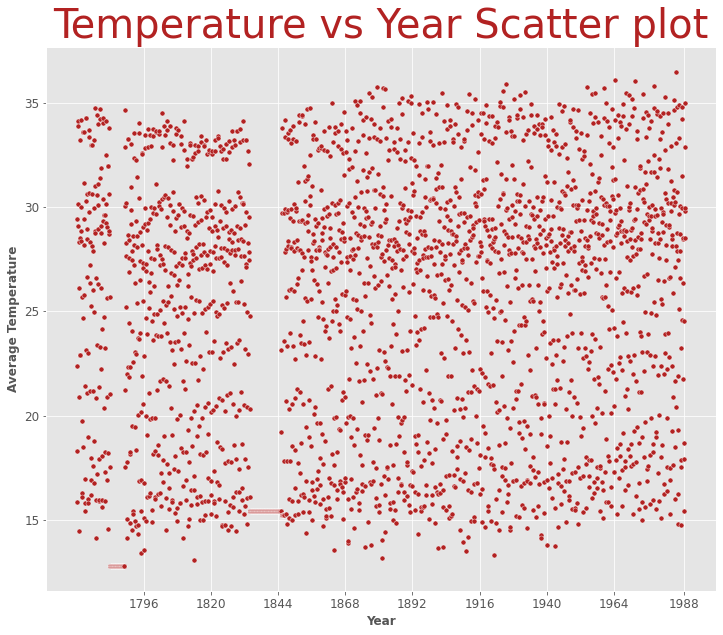

In [ ]:
sns.scatterplot(x=jaipur_data.index,y=jaipur_data.AverageTemperature,s=25,color='firebrick')
plt.xticks(x_ticks_year_index,x_ticks_year_list)
plt.title('Temperature vs Year Scatter plot',color='firebrick',fontsize=40)
plt.xlabel('Year')
plt.ylabel('Average Temperature')

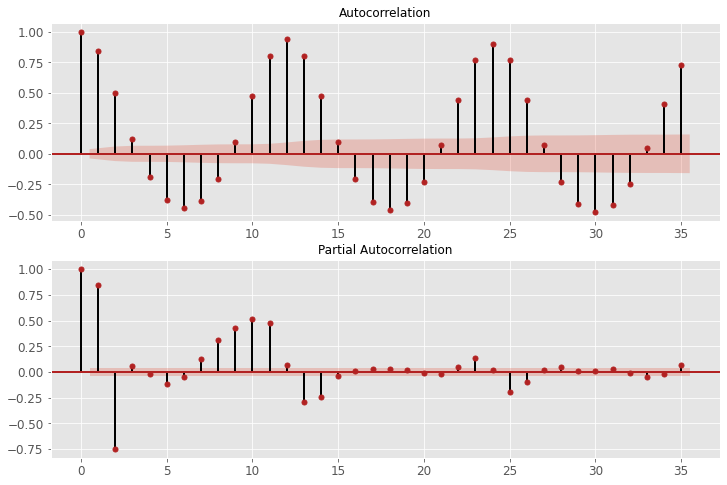

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(jaipur_data.AverageTemperature, ax=ax1,color ='firebrick')
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(jaipur_data.AverageTemperature, ax=ax2,color='firebrick')

In [ ]:
result = adfuller(jaipur_data.AverageTemperature)
print('ADF Statistic on the entire dataset: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic on the entire dataset: -4.205422923297852
p-value: 0.0006451106685621835
Critical Values:
	1%: -3.432883207440573
	5%: -2.86265917358419
	10%: -2.5673657767315414


In [ ]:
result = adfuller(jaipur_data.AverageTemperature[0:120])
print('ADF Statistic on the first decade: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic on the first decade: -4.13232045122746
p-value: 0.000856007297855879
Critical Values:
	1%: -3.4924012594942333
	5%: -2.8886968193364835
	10%: -2.5812552709190673


In [ ]:
pip install eikon


In [ ]:
import eikon as ek


In [ ]:
rics = [
    'dt',
    'AverageTemperature',
    'AverageTemperatureUncertainty', 
    'City',
    'Latitude'
    'Longitude'
    'Year',
    'Month',
    'Day',
    'Weekday'
    
]


In [ ]:
# from matplotlib import pyplot
# series = plt('jaipur_data', header=0, index_col=0, parse_dates=True, squeeze=True)
# series.plot()
# pyplot.show()
temp = ek.get_timeseries(rics,  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='1992-02-12',  # start date
                         end_date='2013-01-01', # end date
                         interval='month') 
print(temp)
# N = len(temp.AverageTemperature)
# split = 0.95
# training_size = round(split*N)
# test_size = round((1-split)*N)
# series = temp.AverageTemperature[:training_size]
# date = temp.dt[:training_size]
# test_series = temp.AverageTemperature[len(date)-1:len(temp)]
# test_date = temp.dt[len(date)-1:len(temp)]
#test_date = test_date.reset_index().dt
#test_series = test_series.reset_index().AverageTemperature

HTTP request failed: 'NoneType' object has no attribute 'http_request'


None
